In [26]:
import numpy as np
import pandas as pd
from urllib.request import urlopen
import json

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.validators.scatter.marker import SymbolValidator

import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글폰트 설정
mpl.rc('font',family='Malgun Gothic')

# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 
DEFAULT_PLOTLY_COLORS=['rgb(31, 119, 180)', 'rgb(255, 127, 14)',
                       'rgb(44, 160, 44)', 'rgb(214, 39, 40)',
                       'rgb(148, 103, 189)', 'rgb(140, 86, 75)',
                       'rgb(227, 119, 194)', 'rgb(127, 127, 127)',
                       'rgb(188, 189, 34)', 'rgb(23, 190, 207)']

# 기본 폰트 설정
layout_font = {'font':dict(size=12,color='#60606e',family='Malgun Gothic' )}

데이터셋 불러오기

In [27]:
df18 = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-추정매출)_2018.csv')
df19 = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-추정매출)_2019.csv')
df20 = pd.read_csv('서울시우리마을가게상권분석서비스(상권-추정매출)_2020.csv')
dec = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-점포).csv',encoding='cp949')

df1 = pd.read_csv('행정동코드.csv')
df2= pd.read_csv('상권영역.csv',index_col=False)


In [28]:
code = df1[df1["CT_NM(시군구명)"]=='용산구']
code.rename(columns={'H_SDNG_CD(통계청행정동코드)':"통계청행정동코드"},inplace=True)
code.rename(columns={'H_DNG_CD(행자부행정동코드)':"행정동코드"},inplace=True)
code.rename(columns={"DO_NM(시도명)":"시도명"},inplace=True)
code.rename(columns={"CT_NM(시군구명)":"시군구명"},inplace=True)
code.rename(columns={"H_DNG_NM(행정동명)":"행정동명"},inplace=True)

df2 = pd.merge(df2,code, how='left', left_on='ADSTRD_CD', right_on='행정동코드')#code.iloc[:,1:]
df2 = df2.dropna()

df18 = pd.merge(df18,df2, how='left', left_on='상권_코드', right_on='TRDAR_CD')
df18 = df18.dropna()
df19 = pd.merge(df19,df2, how='left', left_on='상권_코드', right_on='TRDAR_CD')
df19 = df19.dropna()
df20 = pd.merge(df20,df2, how='left', left_on='상권_코드', right_on='TRDAR_CD')
df20 = df20.dropna()
dec = pd.merge(dec,df2, how='left', left_on='상권_코드', right_on='TRDAR_CD')
dec = dec.dropna()

In [29]:
## 행정동 기준으로 

# df_18 = pd.DataFrame(df18.groupby(['기준_분기_코드','행정동명'], as_index=False)['분기당_매출_금액'].mean())
# df_19 = pd.DataFrame(df19.groupby(['기준_분기_코드','행정동명'], as_index=False)['분기당_매출_금액'].mean())
# df_20 = pd.DataFrame(df20.groupby(['기준_분기_코드','행정동명'], as_index=False)['분기당_매출_금액'].mean())

df_18 = df18.query('(행정동명 =="이태원1동")|(행정동명 =="이태원2동")')
df_19 = df19.query('(행정동명 =="이태원1동")|(행정동명 =="이태원2동")')
df_20 = df20.query('(행정동명 =="이태원1동")|(행정동명 =="이태원2동")')
dec_0 = dec.query('(행정동명 =="이태원1동")|(행정동명 =="이태원2동")')

In [30]:
df_19.query('상권_코드_명 == "서울 용산구 이태원역"')

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,XCNTS_VALU,YDNTS_VALU,SIGNGU_CD,ADSTRD_CD,STDR_YM_CD,통계청행정동코드,행정동코드,시도명,시군구명,행정동명
218,2019,1,D,발달상권,1001150,서울 용산구 이태원역,CS300002,편의점,3024593222,532821,...,199532.0,448274.0,11170.0,11170650.0,201810.0,1103065.0,11170650.0,서울,용산구,이태원1동
883,2019,1,D,발달상권,1001150,서울 용산구 이태원역,CS300017,시계및귀금속,313708881,1157,...,199532.0,448274.0,11170.0,11170650.0,201810.0,1103065.0,11170650.0,서울,용산구,이태원1동
1775,2019,1,D,발달상권,1001150,서울 용산구 이태원역,CS300001,슈퍼마켓,9413989685,471388,...,199532.0,448274.0,11170.0,11170650.0,201810.0,1103065.0,11170650.0,서울,용산구,이태원1동
1828,2019,1,D,발달상권,1001150,서울 용산구 이태원역,CS300022,화장품,3338649993,182383,...,199532.0,448274.0,11170.0,11170650.0,201810.0,1103065.0,11170650.0,서울,용산구,이태원1동
4957,2019,1,D,발달상권,1001150,서울 용산구 이태원역,CS300014,신발,235565263,1578,...,199532.0,448274.0,11170.0,11170650.0,201810.0,1103065.0,11170650.0,서울,용산구,이태원1동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132996,2019,4,D,발달상권,1001150,서울 용산구 이태원역,CS300010,반찬가게,544272339,7681,...,199532.0,448274.0,11170.0,11170650.0,201810.0,1103065.0,11170650.0,서울,용산구,이태원1동
134171,2019,4,D,발달상권,1001150,서울 용산구 이태원역,CS300015,가방,1003498250,3496,...,199532.0,448274.0,11170.0,11170650.0,201810.0,1103065.0,11170650.0,서울,용산구,이태원1동
134511,2019,4,D,발달상권,1001150,서울 용산구 이태원역,CS300022,화장품,1030268411,42361,...,199532.0,448274.0,11170.0,11170650.0,201810.0,1103065.0,11170650.0,서울,용산구,이태원1동
135376,2019,4,D,발달상권,1001150,서울 용산구 이태원역,CS100003,일식음식점,191068729,3653,...,199532.0,448274.0,11170.0,11170650.0,201810.0,1103065.0,11170650.0,서울,용산구,이태원1동


In [31]:
yd = pd.read_csv('상권별 유동인구.csv')

In [32]:
tmp1 = df_19.query('행정동명=="이태원1동"')['상권_코드'].unique()
tmp2 = df_19.query('행정동명=="이태원2동"')['상권_코드'].unique()

def classification(x):
    if x['상권 코드'] in tmp1:
        return '이태원1동'
    elif x['상권 코드'] in tmp2:
        return '이태원2동'

yd['행정동명'] = yd.apply(classification,axis=1)

yd['생활인구(평균)'] = yd['생활인구(평균)'].str.replace(',','')
yd['생활인구(평균)'] = yd['생활인구(평균)'].astype('int64') 

점포수

In [33]:
df_19_sum = pd.DataFrame(df_19.groupby(['기준_분기_코드','상권_코드_명','행정동명'], as_index=False)['점포수'].sum())
df_20_sum = pd.DataFrame(df_20.groupby(['기준_분기_코드','상권_코드_명','행정동명'], as_index=False)['점포수'].sum())
jumpo = pd.concat([df_19_sum,df_20_sum])

매출금액평균

In [34]:
df_18 = pd.DataFrame(df_18.groupby(['기준_분기_코드','상권_코드_명','행정동명'], as_index=False)['분기당_매출_금액'].mean())
df_19 = pd.DataFrame(df_19.groupby(['기준_분기_코드','상권_코드_명','행정동명'], as_index=False)['분기당_매출_금액'].mean())
df_20 = pd.DataFrame(df_20.groupby(['기준_분기_코드','상권_코드_명','행정동명'], as_index=False)['분기당_매출_금액'].mean())
# df.groupby(['시간대구분','행정동명'])['총생활인구수'].transform('mean')

In [35]:
df_18['분기당_매출_금액'] = df_18['분기당_매출_금액'].astype('int64')
df_19['분기당_매출_금액'] = df_19['분기당_매출_금액'].astype('int64')
df_20['분기당_매출_금액'] = df_20['분기당_매출_금액'].astype('int64')

df_19['전년도 분기 대비 매출증감액'] = df_19["분기당_매출_금액"].values - df_18["분기당_매출_금액"].values

df_19['전년도 분기 대비 매출증감율'] = (df_19['전년도 분기 대비 매출증감액'].values / df_18["분기당_매출_금액"].values) * 100

df_20['전년도 분기 대비 매출증감액'] = df_20["분기당_매출_금액"].values - df_19["분기당_매출_금액"].values
df_20['전년도 분기 대비 매출증감율'] = (df_20['전년도 분기 대비 매출증감액'].values / df_19["분기당_매출_금액"].values) * 100

def year_add(x):
    return '2019년 '+str(x)+'분기'

df_19['기준_분기_코드'] = df_19['기준_분기_코드'].apply(year_add)

def year_add(x):
    return '2020년 '+str(x)+'분기'

df_20['기준_분기_코드'] = df_20['기준_분기_코드'].apply(year_add)

In [36]:
result = pd.concat([df_19,df_20])

In [37]:
result['전년도 분기 대비 매출증감율'] = result['전년도 분기 대비 매출증감율'].round(1)

In [38]:
result.sort_values(by=['기준_분기_코드','상권_코드_명'],inplace=True)

In [39]:
yd.sort_values(by=['분기','상권 코드 명'],inplace=True)

In [40]:
yd.reset_index(drop=True,inplace=True)

In [41]:
result.reset_index(drop=True,inplace=True)

In [42]:
result['생활인구(평균)'] = yd['생활인구(평균)']

In [43]:
jumpo.sort_values(by=['기준_분기_코드','상권_코드_명'],inplace=True)
jumpo.reset_index(drop=True,inplace=True)

In [44]:
result['점포수'] = jumpo['점포수']

In [45]:
result['생활인구(총합)'] = result['생활인구(평균)'].values * 2 

In [23]:
def social_dist_dummy(x):
    if x['기준_분기_코드'] == "2019년 1분기": return 0
    elif x['기준_분기_코드'] == "2019년 2분기": return 0
    elif x['기준_분기_코드'] == "2019년 3분기": return 0
    elif x['기준_분기_코드'] == "2019년 4분기": return 0
    elif x['기준_분기_코드'] == "2020년 1분기": return 0
    elif x['기준_분기_코드'] == "2020년 2분기": return 0
    elif x['기준_분기_코드'] == "2020년 3분기": return 1
    elif x['기준_분기_코드'] == "2020년 4분기": return 1

result['사회적거리두기_2단계'] = result.apply(social_dist_dummy,axis=1)


In [24]:
def sub_money_dummy(x):
    if x['기준_분기_코드'] == "2019년 1분기": return 0
    elif x['기준_분기_코드'] == "2019년 2분기": return 0
    elif x['기준_분기_코드'] == "2019년 3분기": return 0
    elif x['기준_분기_코드'] == "2019년 4분기": return 0
    elif x['기준_분기_코드'] == "2020년 1분기": return 0
    elif x['기준_분기_코드'] == "2020년 2분기": return 1
    elif x['기준_분기_코드'] == "2020년 3분기": return 1
    elif x['기준_분기_코드'] == "2020년 4분기": return 0
    
result['지원금'] = result.apply(sub_money_dummy,axis=1)


In [25]:
result[pd.get_dummies(result['기준_분기_코드']).columns] = pd.get_dummies(result['기준_분기_코드']).values


In [24]:
# def year_dummy(x):
#     if '2019년' ==x['기준_분기_코드'].split()[0]  :
#         return 0
#     else:
#         return 1

# result['년(dummy)'] = result.apply(year_dummy,axis=1)


In [25]:
# def bungi1_dummy(x):
#     if x['기준_분기_코드'].split()[1] == '1분기': return 0
#     else : return 0
# def bungi2_dummy(x):
#     if x['기준_분기_코드'].split()[1] == '2분기': return 1
#     else : return 0
# def bungi3_dummy(x):
#     if x['기준_분기_코드'].split()[1] == '3분기': return 1
#     else : return 0
# def bungi4_dummy(x):
#     if x['기준_분기_코드'].split()[1] == '4분기': return 1
#     else : return 0

# result['1분기(dummy)'] = result.apply(bungi1_dummy,axis=1)
# result['2분기(dummy)'] = result.apply(bungi2_dummy,axis=1)
# result['3분기(dummy)'] = result.apply(bungi3_dummy,axis=1)
# result['4분기(dummy)'] = result.apply(bungi4_dummy,axis=1)


In [26]:
a = pd.read_csv('서울특별시 코로나19 자치구별 확진자 발생동향.csv',encoding='cp949')

In [27]:
a = a[['자치구 기준일','용산구 전체','용산구 추가']]

In [28]:
a.dropna(inplace=True)

In [29]:
a['년'] = pd.to_datetime(a['자치구 기준일']).dt.year

In [30]:
a['월'] = pd.to_datetime(a['자치구 기준일']).dt.month

In [31]:
a = a.query('년==2020')

In [32]:
a.to_csv('2020 용산구 확진자수 추이.csv',index=False)

In [33]:
b = pd.DataFrame(a.groupby(['월'], as_index=False)['용산구 추가'].sum())

In [34]:
def bungi(x):
#     print(x)
    if x in [2,3]:
        return 1
    elif x in [4,5,6]:
        return 2
    elif x in [7,8,9]:
        return 3
    else:
        return 4
b['분기'] = b['월'].apply(bungi)

In [35]:
b = pd.DataFrame(b.groupby(['분기'], as_index=False)['용산구 추가'].sum())

In [36]:
b

,분기,용산구 추가
0,1,12.0
1,2,38.0
2,3,72.0
3,4,294.0


In [38]:
def c(x):
    if x['2019년 1분기'] == 1: return 0
    elif x['2019년 2분기'] == 1: return 0
    elif x['2019년 3분기'] == 1: return 0
    elif x['2019년 4분기'] == 1: return 0
    elif x['2020년 1분기'] == 1: return 12
    elif x['2020년 2분기'] == 1: return 38
    elif x['2020년 3분기'] == 1: return 72
    elif x['2020년 4분기'] == 1: return 294

result['확진자수'] = result.apply(c,axis=1)

선형회귀

In [476]:
result

,기준_분기_코드,상권_코드_명,행정동명,분기당_매출_금액,전년도 분기 대비 매출증감액,전년도 분기 대비 매출증감율,생활인구(평균),점포수,생활인구(총합),사회적거리두기_2단계,지원금,2019년 1분기,2019년 2분기,2019년 3분기,2019년 4분기,2020년 1분기,2020년 2분기,2020년 3분기,2020년 4분기,확진자수
0,2019년 1분기,녹사평대로26길,이태원1동,187140119,-4061331,-2.1,39058,99,78116,0,0,1,0,0,0,0,0,0,0,0
1,2019년 1분기,녹사평대로32길,이태원1동,447236944,56855806,14.6,65437,94,130874,0,0,1,0,0,0,0,0,0,0,0
2,2019년 1분기,녹사평대로40나길,이태원2동,309916132,9908876,3.3,51967,155,103934,0,0,1,0,0,0,0,0,0,0,0
3,2019년 1분기,녹사평대로46길,이태원2동,186163183,-109247490,-37.0,43669,146,87338,0,0,1,0,0,0,0,0,0,0,0
4,2019년 1분기,서울 용산구 이태원역,이태원1동,1354081547,39543919,3.0,96608,95,193216,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2020년 4분기,이태원 관광특구,이태원1동,1728825725,-878897237,-33.7,248378,151,496756,1,0,0,0,0,0,0,0,0,1,294
84,2020년 4분기,이태원로27길,이태원1동,912068550,-766164466,-45.7,42134,4,84268,1,0,0,0,0,0,0,0,0,1,294
85,2020년 4분기,이태원시장,이태원1동,472483963,-175667222,-27.1,4595,7,9190,1,0,0,0,0,0,0,0,0,1,294
86,2020년 4분기,이태원제일시장,이태원2동,77001673,-178350654,-69.8,8388,155,16776,1,0,0,0,0,0,0,0,0,1,294


---

# 회귀분석

In [40]:
# def a(x):
#     if x['기준_분기_코드'] == '2019년 1분기': return 0
#     elif x['기준_분기_코드'] == '2019년 2분기': return 0
#     elif x['기준_분기_코드'] == '2019년 3분기': return 0
#     elif x['기준_분기_코드'] == '2019년 4분기': return 0
#     elif x['기준_분기_코드'] == '2020년 1분기': return 1
#     elif x['기준_분기_코드'] == '2020년 2분기': return 1
#     elif x['기준_분기_코드'] == '2020년 3분기': return 2
#     elif x['기준_분기_코드'] == '2020년 4분기': return 2

# result['사회적거리두기_2단계'] = result.apply(a,axis=1)

# so_dist = pd.get_dummies(result['사회적거리두기_2단계'],drop_first=True).rename(columns={1:"사회적거리두기 1단계",2:"사회적거리두기 2단계"})

# so_dist['생활인구(총합)'] = result['생활인구(총합)']

# so_dist

In [41]:
result1 = result[['기준_분기_코드','분기당_매출_금액', '전년도 분기 대비 매출증감액', '생활인구(총합)','확진자수']]

In [42]:
def asdf(x):
    if x['전년도 분기 대비 매출증감액'] < 0:
        return float('-'+str(np.log(abs(x['전년도 분기 대비 매출증감액']))))
    else:
        return np.log(x['전년도 분기 대비 매출증감액'])
        
result1['전년도 분기 대비 매출증감액'] = result1.apply(asdf ,axis=1)

In [43]:
result1['생활인구(총합)'] = np.log(result['생활인구(총합)'])
result1['분기당_매출_금액'] = np.log(result['분기당_매출_금액'].values / result['점포수'].values)
# result1['확진자수'] = np.log(result['확진자수'])

In [44]:
# 레이블 분리
data_money = result1[["분기당_매출_금액"]]
data_corona = result[['지원금']]
data = result1.drop("분기당_매출_금액", axis=1)

In [45]:
result1

,기준_분기_코드,분기당_매출_금액,전년도 분기 대비 매출증감액,생활인구(총합),확진자수
0,2019년 1분기,14.452248,-15.217021,11.265950,0
1,2019년 1분기,15.375304,17.856029,11.781990,0
2,2019년 1분기,14.508387,16.108941,11.551511,0
3,2019년 1분기,14.058528,-18.509126,11.377541,0
4,2019년 1분기,16.472512,17.492922,12.171564,0
...,...,...,...,...,...
83,2020년 4분기,16.253428,-20.594179,13.115854,294
84,2020년 4분기,19.244931,-20.456907,11.341757,294
85,2020년 4분기,18.027604,-18.984102,9.125871,294
86,2020년 4분기,13.115913,-18.999262,9.727705,294


In [46]:
# 범주형 특징(sex)에 대한 원핫 인코딩
from sklearn.preprocessing import OneHotEncoder
data_code = data[["기준_분기_코드"]]
onehot_encoder = OneHotEncoder()
data_code_onehot = onehot_encoder.fit_transform(data_code)
print(onehot_encoder.categories_)

[array(['2019년 1분기', '2019년 2분기', '2019년 3분기', '2019년 4분기', '2020년 1분기',
       '2020년 2분기', '2020년 3분기', '2020년 4분기'], dtype=object)]


In [47]:
data = data.drop("기준_분기_코드", axis=1)

In [48]:
# 범주형 필드가 제거되어 수치형 특징들에 대해 0~1 구간의 크기로 조정
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# minmax_scaler = StandardScaler()
# data = minmax_scaler.fit_transform(data)

In [49]:
# 원핫인코딩된 범주형 특징과 스케일링된 수치형 특징 및 레이블 결합
data = np.c_[data_code_onehot.toarray(),data, data_corona,data_money]#

In [50]:
data = pd.DataFrame(data, columns=['2019년 1분기', '2019년 2분기', '2019년 3분기', '2019년 4분기', '2020년 1분기', '2020년 2분기', 
                                   '2020년 3분기', '2020년 4분기','전년도 분기 대비 매출증감액', 
                                    '생활인구(총합)', '확진자수','지원금','분기당_매출_금액'])

In [51]:
data = data.drop("2019년 1분기", axis=1)

In [101]:
data

,2019년 2분기,2019년 3분기,2019년 4분기,2020년 1분기,2020년 2분기,2020년 3분기,2020년 4분기,전년도 분기 대비 매출증감액,생활인구(총합),확진자수,지원금,분기당_매출_금액
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-15.217021,11.265950,0.0,0.0,14.452248
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.856029,11.781990,0.0,0.0,15.375304
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.108941,11.551511,0.0,0.0,14.508387
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-18.509126,11.377541,0.0,0.0,14.058528
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.492922,12.171564,0.0,0.0,16.472512
...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-20.594179,13.115854,294.0,0.0,16.253428
84,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-20.456907,11.341757,294.0,0.0,19.244931
85,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-18.984102,9.125871,294.0,0.0,18.027604
86,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-18.999262,9.727705,294.0,0.0,13.115913


In [52]:
def covid(x):
    if x['확진자수'] < 0:
        return 0
    else:
        return x['확진자수']
        
data['확진자수'] = data.apply(covid ,axis=1)

In [53]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.1)#, random_state=47


# 입력 특징과 레이블의 분리
train_data = train_set.drop("분기당_매출_금액", axis=1)
train_data_label = train_set["분기당_매출_금액"].copy()
test_data = test_set.drop("분기당_매출_금액", axis=1)
test_data_label = test_set["분기당_매출_금액"].copy()

회귀분석

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(train_data, train_data_label)
some_predicted = model.predict(test_data)
mse = np.sqrt(mean_squared_error(some_predicted, test_data_label))
print('평균제곱근오차', mse)

평균제곱근오차 1.4211701158728551


의사결정트리

In [55]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(train_data, train_data_label)

from sklearn.metrics import mean_squared_error
some_predicted = model.predict(test_data)
mse = np.sqrt(mean_squared_error(some_predicted, test_data_label))
print('평균제곱근오차', mse)

평균제곱근오차 1.6125371449461912


랜덤포레스트

## 랜덤 포레스트

평균제곱근오차 1.110880466366488
훈련 세트 정확도 : 0.881
테스트 세트 정확도 : 0.325
2019년 2분기 : 0.018079405459227177
2019년 3분기 : 0.012356242564671112
2019년 4분기 : 0.016594113769646823
2020년 1분기 : 0.006145231324940891
2020년 2분기 : 0.019887451553255723
2020년 3분기 : 0.007253323189633675
2020년 4분기 : 0.006700726813393263
전년도 분기 대비 매출증감액 : 0.41169076209069083
생활인구(총합) : 0.4735912275183541
확진자수 : 0.023789733231920872
지원금 : 0.003911782484265573


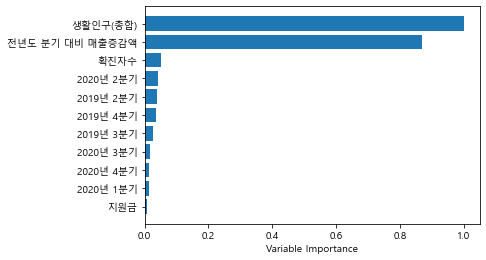

In [65]:
 # coding: utf-8
from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

forest = RandomForestRegressor()
forest.fit(train_data, train_data_label)
some_predicted = forest.predict(test_data)
mse = np.sqrt(mean_squared_error(some_predicted, test_data_label))
print('평균제곱근오차', mse)
print("훈련 세트 정확도 : {:.3f}".format(forest.score(train_data,train_data_label)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(test_data,test_data_label)))


# 특성 중요도
# print("특성 중요도 : \n{}".format(forest.feature_importances_))
li = [i for i in zip(forest.feature_importances_,train_data.columns)]
for i in li:
    print(f'{i[1]} : {i[0]}')

#피처 중요도 도표 그리기
featureImportance = forest.feature_importances_

col = np.array(train_data.columns)
#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)

barPos = np.arange(sorted_idx.shape[0])+.5

plt.barh(barPos, featureImportance[sorted_idx], align='center')
plt.yticks(barPos, col[sorted_idx])
plt.xlabel('Variable Importance')
plt.show()


---

In [301]:
df = pd.read_csv('result.csv')

In [302]:
df = df.iloc[44:]
# df1= pd.DataFrame(df1.groupby([''], as_index=False)['용산구 추가'].sum())

In [303]:
df1 = df[['상권_코드_명','전년도 분기 대비 매출증감액','생활인구(총합)']]

In [305]:
df1.head(2)

,상권_코드_명,전년도 분기 대비 매출증감액,생활인구(총합)
44,녹사평대로26길,618763676,63338
45,녹사평대로32길,-75240892,100692


In [838]:
upjong = pd.read_csv('이태원_증감액_증감율.csv',encoding='cp949')

In [839]:
upjong_tmp=pd.DataFrame(upjong.groupby(['서비스_업종','분기'], as_index=False)['2020_분기당_매출_금액'].mean())

In [840]:
upjong_tmp=pd.DataFrame(upjong_tmp.groupby(['서비스_업종'], as_index=False)['2020_분기당_매출_금액'].sum())

In [841]:
# upjong_tmp['2020_분기당_매출_금액'][upjong_tmp['2020_분기당_매출_금액'] < 0]

In [842]:
upjong = pd.DataFrame(upjong.groupby(['서비스_업종'], as_index=False)['2019~2020_증감액'].mean())

In [843]:
upjong['업종 당 매출규모'] = upjong_tmp['2020_분기당_매출_금액']

In [844]:
upjong.set_index(keys=['서비스_업종'],inplace=True)

In [845]:
from sklearn.cluster import KMeans
plt.rcParams["figure.figsize"] = (10,5)
# k=3 클러스터 생성
estimator = KMeans(n_clusters = 3)
cluster_ids = estimator.fit_predict(upjong)

Text(0, 0.5, '2019~2020_증감액')

C:\ananconda\envs\multi\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ananconda\envs\multi\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


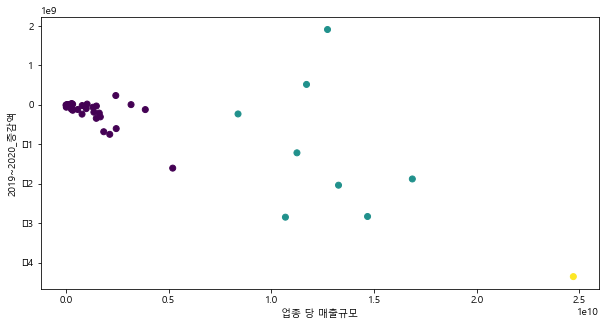

In [846]:
plt.scatter(upjong['업종 당 매출규모'],upjong['2019~2020_증감액'],c=cluster_ids)
plt.xlabel("업종 당 매출규모")
plt.ylabel("2019~2020_증감액")

In [847]:
tmp = []
for clc ,name in zip(cluster_ids,upjong.index):
    tmp.append((name,clc))

tmp = sorted(tmp, key=lambda x: x[1])

tmp

[('가구', 0),
 ('가방', 0),
 ('가전제품수리', 0),
 ('골프연습장', 0),
 ('네일숍', 0),
 ('노래방', 0),
 ('당구장', 0),
 ('문구', 0),
 ('미용실', 0),
 ('반찬가게', 0),
 ('분식전문점', 0),
 ('서적', 0),
 ('섬유제품', 0),
 ('세탁소', 0),
 ('수산물판매', 0),
 ('스포츠클럽', 0),
 ('시계및귀금속', 0),
 ('안경', 0),
 ('애완동물', 0),
 ('여관', 0),
 ('예술학원', 0),
 ('운동/경기용품', 0),
 ('의약품', 0),
 ('일반의원', 0),
 ('일식음식점', 0),
 ('자동차미용', 0),
 ('전자상거래업', 0),
 ('제과점', 0),
 ('조명용품', 0),
 ('중식음식점', 0),
 ('철물점', 0),
 ('치과의원', 0),
 ('치킨전문점', 0),
 ('패스트푸드점', 0),
 ('피부관리실', 0),
 ('한의원', 0),
 ('핸드폰', 0),
 ('화장품', 0),
 ('화초', 0),
 ('슈퍼마켓', 1),
 ('신발', 1),
 ('육류판매', 1),
 ('일반의류', 1),
 ('커피-음료', 1),
 ('편의점', 1),
 ('한식음식점', 1),
 ('호프-간이주점', 1),
 ('양식음식점', 2)]

---

In [852]:
dec_1 = dec_0.query('(기준_년_코드==2020)')

In [853]:
dec_1.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수',
       '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수', 'Unnamed: 0', 'TRDAR_SE_C',
       'TRDAR_SE_1', 'TRDAR_CD', 'TRDAR_CD_N', 'XCNTS_VALU', 'YDNTS_VALU',
       'SIGNGU_CD', 'ADSTRD_CD', 'STDR_YM_CD', '통계청행정동코드', '행정동코드', '시도명',
       '시군구명', '행정동명'],
      dtype='object')

In [860]:
dec_1[dec_1['서비스_업종_코드_명'] == '양식음식점']['점포_수'].sum()

1533

In [717]:
# dec_0.iloc[:,3:15]
dec_1 = pd.DataFrame(dec_1.groupby(['서비스_업종_코드_명'], as_index=False)['점포_수','유사_업종_점포_수','개업_점포_수','폐업_점포_수'].sum())

C:\ananconda\envs\multi\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [848]:
dec_1

,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_점포_수,폐업_점포_수
0,DVD방,0,0,0,0
1,PC방,0,0,0,0
2,가구,227,227,2,2
3,가방,699,699,7,5
4,가전제품,12,12,0,0
...,...,...,...,...,...
91,핸드폰,82,82,0,3
92,호프-간이주점,913,953,13,69
93,화장품,282,304,6,12
94,화초,143,143,4,6


In [718]:
upjong = pd.merge(upjong,dec_1, how='left', left_on='서비스_업종', right_on='서비스_업종_코드_명')
upjong = upjong.dropna()

In [719]:
upjong.drop(columns=['서비스_업종_코드_명'],axis=1,inplace=True)

In [720]:
def asdf(x):
    if x['2019~2020_증감액'] < 0:
        return float('-'+str(np.log(abs(x['2019~2020_증감액']))))
    else:
        return np.log(x['2019~2020_증감액'])
        
upjong['2019~2020_증감액'] = upjong.apply(asdf ,axis=1) # y['전년도 분기 대비 매출증감액'] 

In [721]:
upjong.set_index(keys=['서비스_업종'],inplace=True)

In [722]:
upjong1 = upjong

In [723]:
upjong1 = upjong1[['2019~2020_증감액','폐업_점포_수']]

In [724]:
upjong1['폐업_점포_수'] = upjong1['폐업_점포_수'].astype(float)

In [725]:
from sklearn.cluster import KMeans
plt.rcParams["figure.figsize"] = (10,5)
# k=3 클러스터 생성
estimator = KMeans(n_clusters = 3)
cluster_ids = estimator.fit_predict(upjong1)

In [ ]:
plt.scatter(upjong1['폐업_점포_수'],upjong1['2019~2020_증감액'],c=cluster_ids)
plt.xlabel("폐업_점포_수")
plt.ylabel("2019~2020_증감액")

In [863]:
tmp = []
for clc ,name in zip(cluster_ids,upjong1.index):
    tmp.append((name,clc))

tmp = sorted(tmp, key=lambda x: x[1])

tmp

[('가구', 0),
 ('가방', 0),
 ('가전제품수리', 0),
 ('골프연습장', 0),
 ('네일숍', 0),
 ('노래방', 0),
 ('당구장', 0),
 ('문구', 0),
 ('미용실', 0),
 ('반찬가게', 0),
 ('분식전문점', 0),
 ('서적', 0),
 ('섬유제품', 0),
 ('세탁소', 0),
 ('수산물판매', 0),
 ('스포츠클럽', 0),
 ('시계및귀금속', 0),
 ('안경', 0),
 ('애완동물', 0),
 ('여관', 0),
 ('예술학원', 0),
 ('운동/경기용품', 0),
 ('의약품', 0),
 ('일반의원', 0),
 ('일식음식점', 0),
 ('자동차미용', 0),
 ('전자상거래업', 0),
 ('제과점', 0),
 ('조명용품', 0),
 ('중식음식점', 0),
 ('철물점', 0),
 ('치과의원', 0),
 ('치킨전문점', 0),
 ('패스트푸드점', 0),
 ('피부관리실', 0),
 ('한의원', 0),
 ('핸드폰', 0),
 ('화장품', 0),
 ('화초', 0),
 ('슈퍼마켓', 1),
 ('신발', 1),
 ('육류판매', 1),
 ('일반의류', 1),
 ('커피-음료', 1),
 ('편의점', 1),
 ('한식음식점', 1),
 ('호프-간이주점', 1),
 ('양식음식점', 2)]

Text(0, 0.5, '2019~2020_증감액')

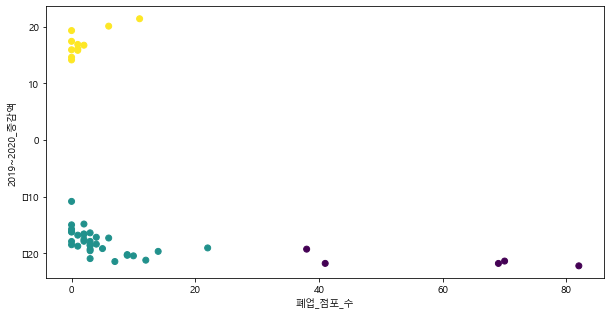

In [460]:
plt.scatter(upjong1['폐업_점포_수'],upjong1['2019~2020_증감액'],c=cluster_ids)
plt.xlabel("폐업_점포_수")
plt.ylabel("2019~2020_증감액")
# for name, total, money in upjong1.itertuples():
#     plt.annotate(name, (total, money))
# # for name, total, money in df1.itertuples():
# #     plt.annotate(name,(total,money))
# plt.show()

In [46]:
result2 = result.iloc[44:,:]
result1 = result.iloc[:44,:]

In [47]:
result1

,기준_분기_코드,상권_코드_명,행정동명,분기당_매출_금액,전년도 분기 대비 매출증감액,전년도 분기 대비 매출증감율,생활인구(평균),점포수,생활인구(총합)
0,2019년 1분기,녹사평대로26길,이태원1동,187140119,-4061331,-2.1,39058,99,78116
1,2019년 1분기,녹사평대로32길,이태원1동,447236944,56855806,14.6,65437,94,130874
2,2019년 1분기,녹사평대로40나길,이태원2동,309916132,9908876,3.3,51967,155,103934
3,2019년 1분기,녹사평대로46길,이태원2동,186163183,-109247490,-37.0,43669,146,87338
4,2019년 1분기,서울 용산구 이태원역,이태원1동,1354081547,39543919,3.0,96608,95,193216
5,2019년 1분기,용산구청,이태원1동,161287679,-6959101,-4.1,5923,88,11846
6,2019년 1분기,이태원 관광특구,이태원1동,2171381459,-12996779,-0.6,341125,97,682250
7,2019년 1분기,이태원로27길,이태원1동,770698146,-4759357,-0.6,67891,82,135782
8,2019년 1분기,이태원시장,이태원1동,545087388,140231889,34.6,6044,645,12088
9,2019년 1분기,이태원제일시장,이태원2동,128105512,14473693,12.7,7472,629,14944


In [48]:
result1 = pd.DataFrame(result1.groupby(['상권_코드_명'], as_index=False)['전년도 분기 대비 매출증감액','생활인구(평균)'].mean())
result2= pd.DataFrame(result2.groupby(['상권_코드_명'], as_index=False)['전년도 분기 대비 매출증감액','생활인구(평균)'].mean())

C:\ananconda\envs\multi\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\ananconda\envs\multi\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [49]:
result2['생활인구 증감'] = result2['생활인구(평균)'].values - result1['생활인구(평균)'].values

In [50]:
result2 = result2[['상권_코드_명','전년도 분기 대비 매출증감액','생활인구 증감']]

In [51]:
result2.set_index(keys=['상권_코드_명'],inplace=True)

In [52]:
result2['생활인구 증감'] = result2['생활인구 증감'].values*1000

In [62]:
from sklearn.cluster import KMeans
plt.rcParams["figure.figsize"] = (10,5)
# k=3 클러스터 생성
estimator = KMeans(n_clusters = 2)
cluster_ids = estimator.fit_predict(result2)

Text(0, 0.5, '2019~2020_증감액')

C:\ananconda\envs\multi\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ananconda\envs\multi\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


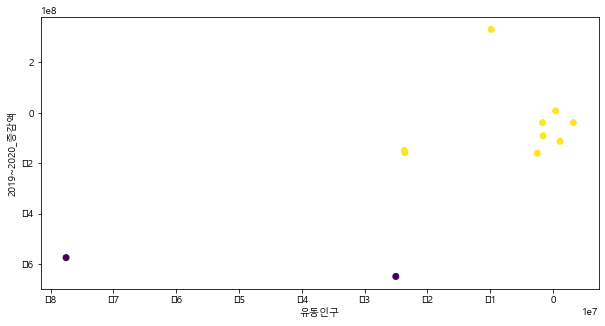

In [63]:
plt.scatter(result2['생활인구 증감'],result2['전년도 분기 대비 매출증감액'],c=cluster_ids)
plt.xlabel("유동인구")
plt.ylabel("2019~2020_증감액")

In [57]:
tmp = []
for clc ,name in zip(cluster_ids,result2.index):
    tmp.append((name,clc))

tmp = sorted(tmp, key=lambda x: x[1])

tmp

[('녹사평대로26길', 0),
 ('녹사평대로32길', 0),
 ('녹사평대로40나길', 0),
 ('녹사평대로46길', 0),
 ('용산구청', 0),
 ('이태원로27길', 0),
 ('이태원시장', 0),
 ('이태원제일시장', 0),
 ('회나무로13길', 0),
 ('서울 용산구 이태원역', 1),
 ('이태원 관광특구', 1)]

---

---

In [477]:
result.head()

,기준_분기_코드,상권_코드_명,행정동명,분기당_매출_금액,전년도 분기 대비 매출증감액,전년도 분기 대비 매출증감율,생활인구(평균),점포수,생활인구(총합),사회적거리두기_2단계,지원금,2019년 1분기,2019년 2분기,2019년 3분기,2019년 4분기,2020년 1분기,2020년 2분기,2020년 3분기,2020년 4분기,확진자수
0,2019년 1분기,녹사평대로26길,이태원1동,187140119,-4061331,-2.1,39058,99,78116,0,0,1,0,0,0,0,0,0,0,0
1,2019년 1분기,녹사평대로32길,이태원1동,447236944,56855806,14.6,65437,94,130874,0,0,1,0,0,0,0,0,0,0,0
2,2019년 1분기,녹사평대로40나길,이태원2동,309916132,9908876,3.3,51967,155,103934,0,0,1,0,0,0,0,0,0,0,0
3,2019년 1분기,녹사평대로46길,이태원2동,186163183,-109247490,-37.0,43669,146,87338,0,0,1,0,0,0,0,0,0,0,0
4,2019년 1분기,서울 용산구 이태원역,이태원1동,1354081547,39543919,3.0,96608,95,193216,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
result = pd.DataFrame(result.groupby(['행정동명'], as_index=False)['전년도 분기 대비 매출증감액','생활인구(총합)'].mean())

---

---

In [153]:
from sklearn.preprocessing import OneHotEncoder
data_code = df1[["상권_코드_명"]]
onehot_encoder = OneHotEncoder()
data_code_onehot = onehot_encoder.fit_transform(data_code)
print(onehot_encoder.categories_)

[array(['녹사평대로26길', '녹사평대로32길', '녹사평대로40나길', '녹사평대로46길', '서울 용산구 이태원역',
       '용산구청', '이태원 관광특구', '이태원로27길', '이태원시장', '이태원제일시장', '회나무로13길'],
      dtype=object)]


In [154]:
df1 = df1.drop("상권_코드_명", axis=1)

In [155]:
df1[['녹사평대로26길', '녹사평대로32길', '녹사평대로40나길', '녹사평대로46길', '서울 용산구 이태원역',
       '용산구청', '이태원 관광특구', '이태원로27길', '이태원시장', '이태원제일시장', '회나무로13길']] = data_code_onehot.toarray()

In [157]:
df1.columns

Index(['전년도 분기 대비 매출증감액', '녹사평대로26길', '녹사평대로32길', '녹사평대로40나길', '녹사평대로46길',
       '서울 용산구 이태원역', '용산구청', '이태원 관광특구', '이태원로27길', '이태원시장', '이태원제일시장',
       '회나무로13길'],
      dtype='object')

In [167]:
x = df1.drop(['전년도 분기 대비 매출증감액'],axis=1)
y = df1[['전년도 분기 대비 매출증감액']]

In [170]:
def asdf(x):
    if x['전년도 분기 대비 매출증감액'] < 0:
        return float('-'+str(np.log(abs(x['전년도 분기 대비 매출증감액']))))
    else:
        return np.log(x['전년도 분기 대비 매출증감액'])
        
y['전년도 분기 대비 매출증감액'] = y.apply(asdf ,axis=1) # y['전년도 분기 대비 매출증감액'] 

In [171]:
model = sm.OLS(y,x)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        전년도 분기 대비 매출증감액   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     10.45
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           1.15e-07
Time:                        13:04:14   Log-Likelihood:                -150.08
No. Observations:                  44   AIC:                             322.2
Df Residuals:                      33   BIC:                             341.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
녹사평대로26길       19.3548      4.232      4.573      0.000      10.744      27.966
녹사평대로32길      -18.7885      4.232     -4.439      0.000     -27.399     -10.178
녹사평대로40나길     -18.8598      4.232     -4.456      0.000     -27.471     -10.249
녹사평대로46길      -17.4158      4.232     -4.115      0.000     -26.027      -8.805
서울 용산구 이태원역   -20.2726      4.232     -4.790      0.000     -28.883     -11.662
용산구청          -17.4119      4.232     -4.114      0.000     -26.023      -8.801
이태원 관광특구      -19.9717      4.232     -4.719      0.000     -28.582     -11.361
이태원로27길        -0.4149      4.232     -0.098      0.923      -9.026       8.196
이태원시장         -18.0878      4.232     -4.274      0.000     -26.699      -9.477
이태원제일시장       -18.2070      4.232     -4.302      0.000     -26.818      -9.596
회나무로13길         8.0929      4.232      1.912      0.065      -0.518      16.704
==============================================================================
Omnibus:                       16.945   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.209
Skew:                          -0.784   Prob(JB):                     1.52e-10
Kurtosis:                       7.711   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [274]:
df1 = pd.DataFrame(df1.groupby(['상권_코드_명'], as_index=False)['전년도 분기 대비 매출증감액','생활인구(총합)'].mean())

C:\ananconda\envs\multi\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [275]:
df1['전년도 분기 대비 매출증감액'] = df1['전년도 분기 대비 매출증감액'].astype(int)

In [247]:
df1.set_index(keys=['상권_코드_명'],inplace=True)
def asdf(x):
    if x['전년도 분기 대비 매출증감액'] < 0:
        return float('-'+str(np.log(abs(x['전년도 분기 대비 매출증감액']))))
    else:
        return np.log(x['전년도 분기 대비 매출증감액'])
        
df1['전년도 분기 대비 매출증감액'] = df1.apply(asdf ,axis=1) 

In [280]:
from sklearn.cluster import KMeans
# k=3 클러스터 생성
estimator = KMeans(n_clusters = 3)
cluster_ids = estimator.fit_predict(df1)

Text(0, 0.5, '생활인구')

C:\ananconda\envs\multi\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ananconda\envs\multi\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


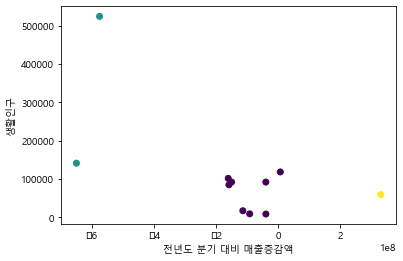

In [283]:
plt.scatter(df1['전년도 분기 대비 매출증감액'],df1['생활인구(총합)'],c=cluster_ids)
plt.xlabel("전년도 분기 대비 매출증감액")
plt.ylabel("생활인구")
# for name, total, money in df1.itertuples():
#     plt.annotate(name,(total,money))
# plt.show()

In [288]:
pd.read_csv('이태원_업종_매출.csv',encoding='cp949')

,서비스_업종,2018_분기당_매출_금액,2019_분기당_매출_금액,2020_분기당_매출_금액,2019~2020_증감액,2019~2020_증감율
0,가구,4.385037e+08,2.503405e+08,322393843,72053347,28.782138
1,가방,1.232309e+10,9.801993e+09,6478807153,-3323186257,-33.903168
2,가전제품수리,5.838654e+07,5.086519e+07,78905434,28040243,55.126585
3,골프연습장,1.875024e+08,1.710253e+08,143908406,-27116873,-15.855477
4,네일숍,1.091461e+09,4.962456e+08,27416285,-468829265,-94.475258
5,노래방,1.970509e+09,1.734198e+09,649296072,-1084902131,-62.559293
6,당구장,1.627804e+08,9.700346e+07,75099294,-21904166,-22.580809
7,문구,3.813563e+08,1.025286e+08,77209260,-25319388,-24.694940
8,미용실,5.351756e+09,4.086099e+09,2946972841,-1139126109,-27.878084
9,반찬가게,8.060688e+08,2.943260e+09,4846470342,1903210164,64.663334


In [173]:
import pandas_profiling
df1.profile_report()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 다중선형회귀모델

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(train_data, train_data_label)
some_predicted = model.predict(test_data)
mse = np.sqrt(mean_squared_error(some_predicted, test_data_label))
print('평균제곱근오차', mse)

평균제곱근오차 1.4211701158728551


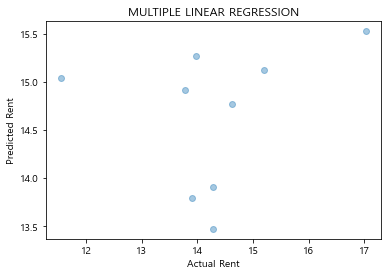

In [82]:
import matplotlib.pyplot as plt
plt.scatter(test_data_label, some_predicted, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k=4)

X_selected = fs.fit_transform(x.values, y.values)
fs.get_support()

NameError: name 'x' is not defined

In [ ]:
RFS_featurn_2 = [i[1] for i in list(zip(fs.get_support(),x.columns)) if i[0] ]
RFS_featurn_2

In [62]:
import statsmodels.api as sm

In [63]:
x = data.drop(['분기당_매출_금액'],axis=1)
y = data[['분기당_매출_금액']]
model = sm.OLS(y,x)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              분기당_매출_금액   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              551.6
Date:                Sun, 18 Jul 2021   Prob (F-statistic):                    1.91e-67
Time:                        16:39:35   Log-Likelihood:                         -180.56
No. Observations:                  88   AIC:                                      379.1
Df Residuals:                      79   BIC:                                      401.4
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
2019년 2분기           1.2280      0.832      1.476      0.144      -0.428       2.884
2019년 3분기           1.0359      0.829      1.249      0.215      -0.615       2.687
2019년 4분기           1.3239      0.829      1.596      0.114      -0.327       2.975
2020년 1분기           1.1363      0.809      1.404      0.164      -0.474       2.747
2020년 2분기           0.3885      0.484      0.803      0.424      -0.574       1.351
2020년 3분기           0.2706      0.459      0.589      0.558      -0.644       1.185
2020년 4분기          -0.1628      0.106     -1.537      0.128      -0.374       0.048
전년도 분기 대비 매출증감액     0.0480      0.013      3.577      0.001       0.021       0.075
생활인구(총합)            1.2649      0.051     24.667      0.000       1.163       1.367
확진자수                0.0064      0.003      2.145      0.035       0.000       0.012
지원금                 0.6591      0.413      1.598      0.114      -0.162       1.480
==============================================================================
Omnibus:                       11.806   Durbin-Watson:                   1.344
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.950
Skew:                           0.742   Prob(JB):                      0.00154
Kurtosis:                       4.153   Cond. No.                     1.02e+20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 9.93e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [908]:
!cd

C:\Users\의원1\git\2021_Multicampus_DataScience\Data-Visualization_project


In [938]:
a = pd.read_csv('../../../Desktop/새 폴더/상권별 생활인구.csv')# euckr ,encoding='utf8'
a.to_csv('../../../Desktop/새 폴더/상권별 생활인구.csv',index=False,encoding="euckr")